# Recap for Part 1 to Part 4 

The following will be divided in different cores, each core will present a main section in a Machine Learning algorithm.

## IMPORT Section

`import torch` import the Pytorch distribution.

`import torch import nn` is a class that halp us implementing a NN, the job could be done without it (it's easier). 

`import torch.nn.functional as F` This module contains all the functions in the torch.nn library. 
As well as a wide range of loss and activation functions, you’ll also find here some convenient functions for creating neural nets, such as pooling functions.

`from torchvision import datasets, transforms` A Dataset can be anything that has a __len__ function (called by Python’s standard len function) and a __getitem__ function as a way of indexing into it. Transforms is a set of tools useful for prepare the images. Images needs a pre-process, in order to make give relevant data to the model we want to train.

`from IPython.core.debugger import set_trace` Useful tool for debugging. Main commands are: `next` and `exit`. Alternative is to use a Mathemathical Python GUI like Spyder.


In [19]:
import torch # Pytorch distribution
from torch import nn # Pytorch class useful for implementing a NN
import torch.nn.functional as F # Pytorch activation func + useful functions
from torchvision import datasets, transforms # Torchvision classes for dataset import and transfrom
from IPython.core.debugger import set_trace # Python Debugger

import helper # Custom library for propability plot

## DATA IMPORT Section

Data can be created randomly or extracted from an available dataset. Let's focus on the second option. With `transforms.Compose` it is defined the want to process the data that is imported.

`datasets.MNIST` is a dataset of numbers available online, with this class we download the dataset into '~/.pytorch/MNIST_data/' (if already not available); if train is true it takes the date from 'training.pt', if false from 'test.pt'. Finally transform takes in an PIL image and returns a transformed version, based on the parameters configured in `transforms.Compose`.

In [53]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the training data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

## MODEL Section

Definition of the model can be made in different ways, using the `nn` module, or with a class definition. When generating a new model we will have weights and biases automatically generated for us

In [54]:
## nn model
model_nn = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,10),
                      nn.Softmax(dim=1))

print(model_nn)
print(model_nn[0].weight)

## Class defined model
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(784, 128)
        # Output layer, 10 units - one for each digit
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.relu(self.fc1(x))

        x = F.softmax(self.fc2(x), dim=1) 
        
        return x

model_class = Network()

print(model_class)
print(model_class.fc1.weight)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): Softmax(dim=1)
)
Parameter containing:
tensor([[ 0.0216, -0.0223,  0.0028,  ..., -0.0052,  0.0161, -0.0214],
        [ 0.0336,  0.0073,  0.0250,  ...,  0.0345, -0.0170,  0.0033],
        [-0.0064, -0.0089,  0.0184,  ..., -0.0313,  0.0208, -0.0031],
        ...,
        [-0.0136,  0.0098,  0.0186,  ...,  0.0355, -0.0075, -0.0257],
        [-0.0165,  0.0209, -0.0354,  ..., -0.0282,  0.0046,  0.0289],
        [-0.0149,  0.0211, -0.0073,  ..., -0.0036,  0.0200, -0.0128]],
       requires_grad=True)
Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Parameter containing:
tensor([[ 0.0091,  0.0018,  0.0003,  ..., -0.0215,  0.0028, -0.0102],
        [ 0.0352,  0.0145, -0.0129,  ..., -0.0170,  0.0132, -0.0171],
        [ 0.0257, -0.0065,  0.0189,  ...,  0.0106,  

## FORWARD PROPAGATION Section

In order to create an algorithm, we need first to propagate forward the inputs. Then with the backward propagation each weights will be updated.

`trainloader` becomes an `iter()` element, useful for the iteration of the algorithm.
The images are resized linearly in order to be passed into the model.

Finally the forward process is called for both models.

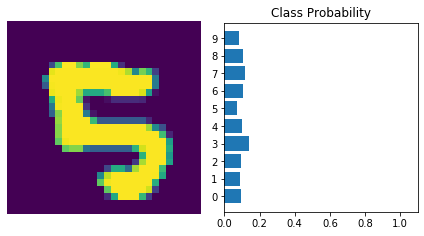

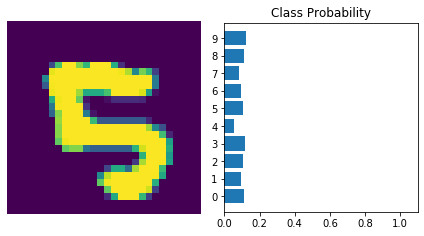

In [55]:
# Grab some data 
images, labels  = next(iter(trainloader))

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

img_idx = 0

# Forward pass through the network with the class based model
ps = model_class.forward(images[img_idx,:])
helper.view_classify(images[img_idx].view(1, 28, 28), ps)

# Forward pass through the network with the nn model
ps = model_nn.forward(images[img_idx,:])
helper.view_classify(images[img_idx].view(1, 28, 28), ps)

## LOSS Section

In order to evaluate our model we need a metric. An error function is needed, the most common are: Cross-Entropy, Squared Error, Log Likelihood Loss.

In [56]:
criterion = nn.CrossEntropyLoss()

## BACK PROPAGATION Section

As said previously now it is time to update our weights and biases. In order to do that we need to compute all the partial derivatives along the network. Thanks to Pytorch this process is really simple, each weight/bias in general each module of the network, has a parameter called `requires_grad` if it is marked as true, every time an operation is computed, the gradient of the element will be computed. These means that after computing the backward process for the first time the first gradient will be available.

<img src='assets/backprop_diagram.png' width=550px>

The loss needs to be computed after the forward process, this will happen using the criterion specified in advance. The loss function will be used then for the backpropagation process. After the sequence is completed we will have the gradient updated.

In [57]:
print(model_nn[0].weight.grad)

images, labels  = next(iter(trainloader))
images.resize_(64, 784)

output = model_nn(images)

loss = criterion(output, labels)
loss.backward()

print(model_nn[0].weight.grad)


None
tensor([[ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        ...,
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004]])


## OPTIMIZER Section

Last step of the algorithm will be the upload of weights and biases, from the torch we recall the `optim` package. This function will take care of the update of weights and biases. 

In [58]:
optimizer = torch.optim.SGD(model_nn.parameters(), lr=0.01)

optimizer.step()


## Final Algorithm + Testing

Now we merge all together! All the elements will be put inside a for loop, that will run for a predetermined epochs.

A test session is added to the end, in order to test the model efficiency



In [60]:
epochs = 5

for i in range(epochs):
    
    current_loss = 0
    
    for images,labels in trainloader:
        # set_trace()
        
        optimizer.zero_grad()

        images = images.view(images.shape[0], -1)

        output = model_nn(images)

        loss = criterion(output, labels)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()
    
    print(f"Training loss: {current_loss/len(trainloader)}")


Training loss: 1.7303047014960349
Training loss: 1.7058943219022202
Training loss: 1.676589637804133
Training loss: 1.6661708700631472
Training loss: 1.6598522200513242


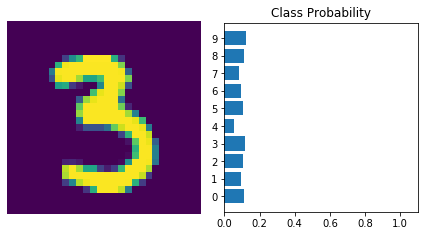

In [70]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

with torch.no_grad():
    logit = model_nn(img)
    
helper.view_classify(img.resize_(1, 28, 28), ps)